# Series 5 - Classification and Logistic Regression


## Aufgabe 5.4

In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Default.csv', sep=';')

# fix df
df = df.drop(columns=['Unnamed: 0'], axis=1)
df = pd.get_dummies(df, columns=['default','student'], drop_first=True)
df = df.rename(columns={'default_Yes': 'default', 'student_Yes': 'student'})
df.head()

,balance,income,default,student
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [47]:
# 5.4 a) Downsampled data set --> same amount of Yes and No
np.random.seed(1)

# Index of Yes:
i_yes = df.loc[df['default'] == 1, :].index

# Random set of No:
i_no = df.loc[df['default'] == 0, :].index
i_no = np.random.choice(i_no, replace=False, size=333)

i_ds = np.concatenate((i_no, i_yes))

# save downsampled dataframe:
df_ds = df.iloc[i_ds]

In [48]:
df_ds

,balance,income,default,student
2287,1306.483031,13984.78526,0,1
1881,946.770746,26618.52276,0,0
3018,877.039197,24902.73549,0,0
2957,726.029344,41996.12441,0,0
7020,1263.798242,47203.82028,0,0
...,...,...,...,...
9912,2148.898454,44309.91717,1,0
9921,1627.898323,17546.99702,1,1
9949,1750.253150,51578.94016,1,0
9951,1515.606239,48688.51209,1,0


In [49]:
# 5.4 b) Logistic regression
import statsmodels.api as sm
x = df_ds[['student']]
x_sm = sm.add_constant(x) 
y = df_ds['default']

# ligistic regression
model = sm.GLM(y, x_sm, family=sm.families.Binomial()).fit()
print(model.summary())

# Prediction
prob_stud = model.predict([1, 1])
prob_nonstud = model.predict([1, 0])

print(f'Probability of default for student: {prob_stud[0]:.3f}')
print(f'Probability of default for non-student: {prob_nonstud[0]:.3f}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                  666
Model:                            GLM   Df Residuals:                      664
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.17
Date:                Wed, 18 Jun 2025   Deviance:                       916.34
Time:                        09:06:43   Pearson chi2:                     666.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1444      0.095     -1.517      0.1

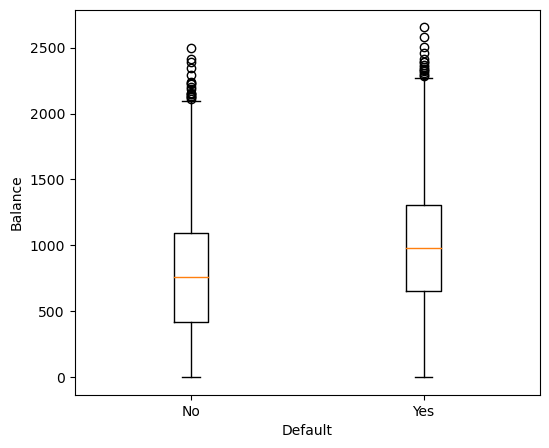

In [55]:
# 5.4 c) Box Plots
from matplotlib import pyplot as plt

df_no = df.loc[df['student'] == 0, :]
df_yes = df.loc[df['student'] == 1, :]

# Create Figure and subplots
fig = plt.figure(figsize=(6, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.boxplot([df_no['balance'], df_yes['balance']])
ax1.set_xlabel('Default')
ax1.set_ylabel('Balance')
ax1.set_xticklabels(['No','Yes'])

# plt.tight_layout()
plt.show()

## Aufgabe 5.5

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/Auto.csv', sep=',')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [86]:
# 5.5 b) binary variable if mpg above mean 
mean_mpg = df['mpg'].mean()
df['mpg01'] = np.where(df['mpg'] > mean_mpg, 1, 0)


df = df.drop(columns=['mpg','name'], axis=1)

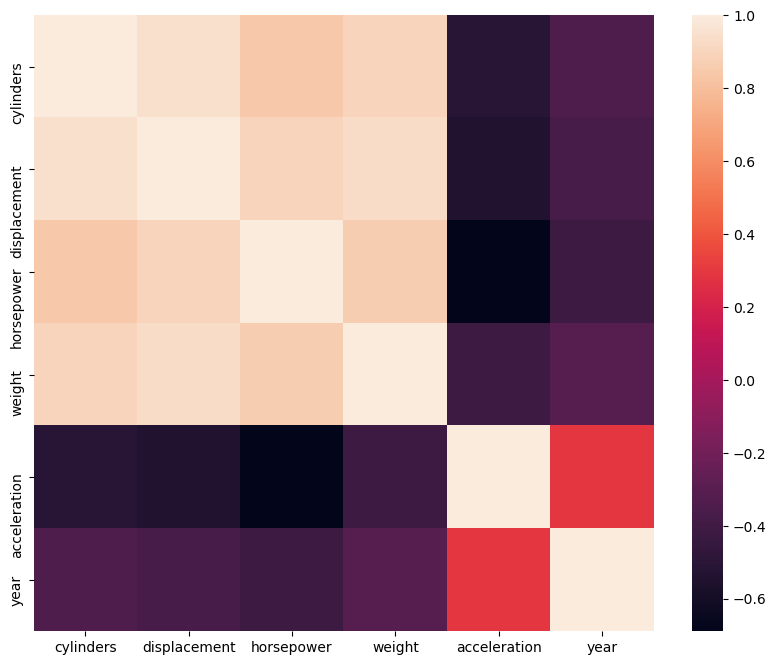

In [ ]:
# 5.5 c) Exploring through plots
import seaborn as sns

corr = df.drop(['origin', 'mpg01'], axis=1).corr()

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr)
plt.show()

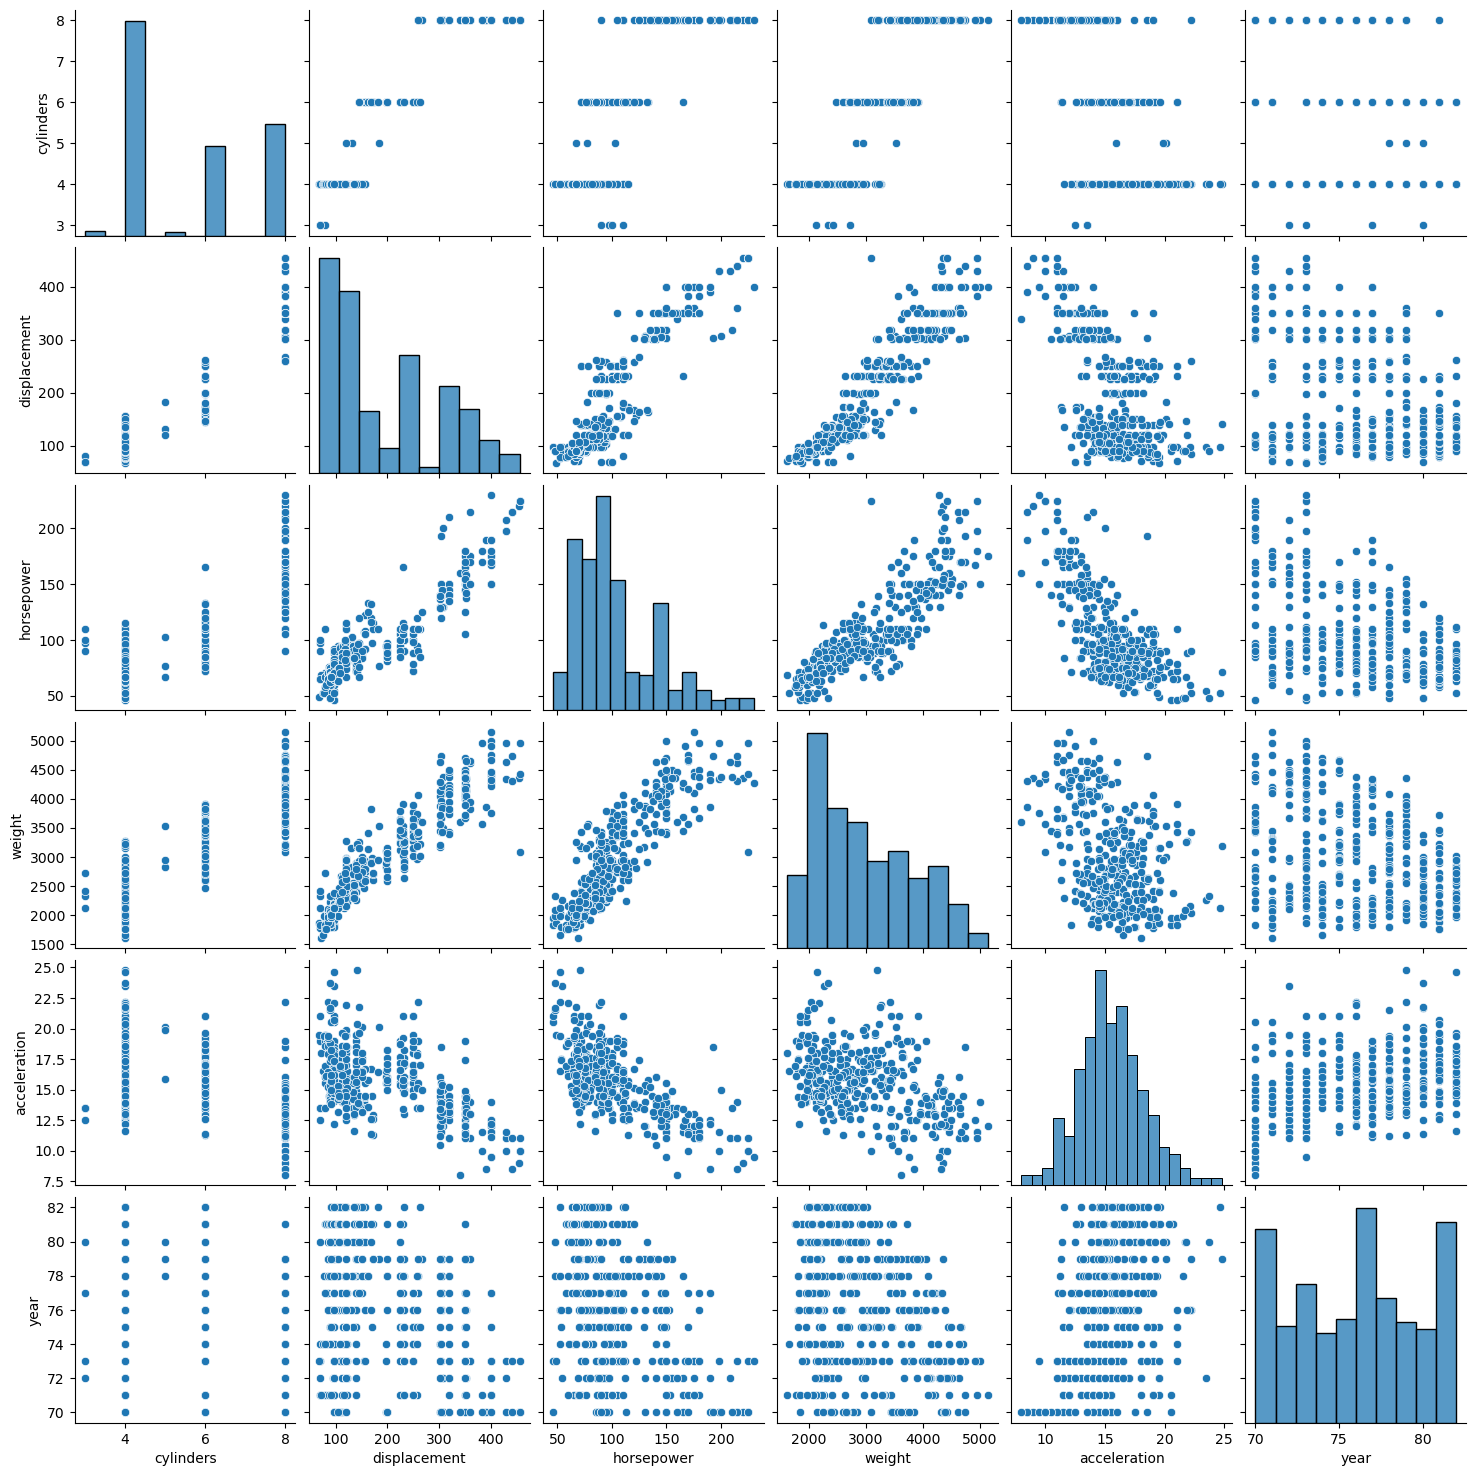

In [88]:
# 5.5 c) Exploring through plots
# Pairplot
import seaborn as sns

fig = sns.pairplot(df.drop(['origin', 'mpg01'], axis=1))
plt.show()

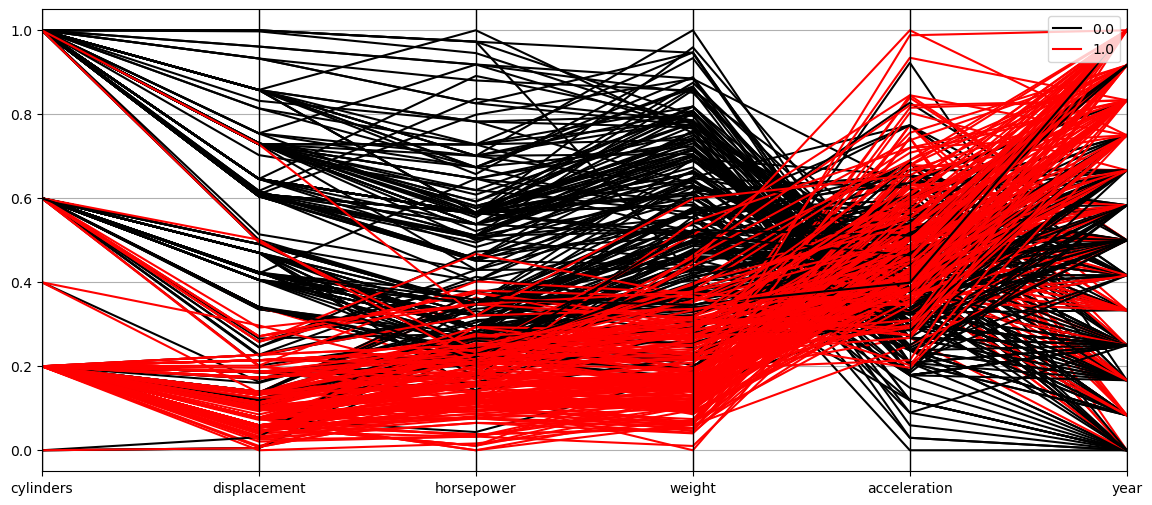

In [89]:
# Parallel coordinates using Pandas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_nor = df.drop(['origin'], axis=1).copy()

df_nor[df_nor.columns] = scaler.fit_transform(df_nor[df_nor.columns] )

# Plot parallel coordinates:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(1, 1, 1)
pd.plotting.parallel_coordinates(df_nor, 'mpg01',ax=ax, color=('k', 'r'))

plt.show()

In [92]:
# 5.5 d) Split data into train and test set
from sklearn.model_selection import train_test_split

x = df.drop(['mpg01'], axis=1)
y = df['mpg01']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# 5.5 e) Logistic regression on training set
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
model = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial()).fit()

# compute classification error

def class_err(x, y, model):
    """ Find classification error for given
    x, y and fitted model """
    y_pred = model.predict(x)
    # Round to 0 or 1
    y_pred = y_pred.round()
    # Classification error
    e = abs(y - y_pred).mean()
    return e


x_test_sm = sm.add_constant(x_test)

e_train = class_err(x_train_sm, y_train, model)
e_test = class_err(x_test_sm, y_test, model)

print('Train error:\n', np.round(e_train, 4),
'\nTest error:\n', np.round(e_test, 4))

Train error:
 0.0958 
Test error:
 0.0253


## Aufgabe 5.6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


df = pd.read_csv('data/Auto.csv', sep=',')
mean_mpg = df['mpg'].mean()
df['mpg01'] = np.where(df['mpg'] > mean_mpg, 1, 0)
df = df.drop(columns=['mpg', 'name'], axis=1)


x = df.drop(['mpg01'], axis=1)
y = df['mpg01']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)
model = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial()).fit()

In [114]:
# 5.6 a) Confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_train = model.predict(x_train_sm).round()
y_pred_test = model.predict(x_test_sm).round()

confusion_train = pd.DataFrame({'predicted': y_pred_train,'true': y_train})
confusion_test = pd.DataFrame({'predicted': y_pred_test,'true': y_test})

confusion_train = pd.crosstab(confusion_train.predicted,confusion_train.true,
                              margins=True, margins_name="Sum")
confusion_test = pd.crosstab(confusion_test.predicted,confusion_test.true,
                             margins=True, margins_name="Sum")

print("Confusion Matrix - Train Set:\n", confusion_train)
print("\nConfusion Matrix - Test Set:\n", confusion_test)

Confusion Matrix - Train Set:
 true         0    1  Sum
predicted               
0.0        141   11  152
1.0         19  142  161
Sum        160  153  313

Confusion Matrix - Test Set:
 true        0   1  Sum
predicted             
0.0        45   1   46
1.0         1  32   33
Sum        46  33   79


In [115]:
# 5.5 b) accuracy, precision, recall, F-1 score
tp = confusion_test[1][1]
tn = confusion_test[0][0]
fp = confusion_test[1][0]
fn = confusion_test[0][1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall)

print(f"Accuracy: {accuracy:.4f}"
      f"\nPrecision: {precision:.4f}"
      f"\nRecall: {recall:.4f}"
      f"\nF1 Score: {f1:.4f}")


Accuracy: 0.9747
Precision: 0.9697
Recall: 0.9697
F1 Score: 0.9697


In [ ]:
# 5.6 c) alpha


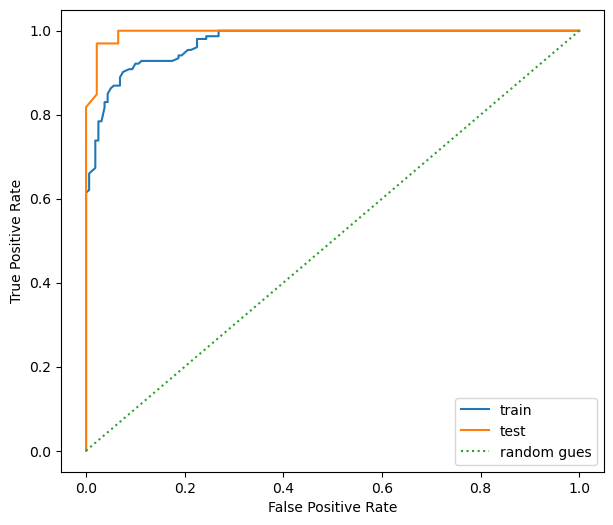

In [116]:
# 5.7 a) ROC curve
n = 100

alpha = np.linspace(0, 1, n)

def class_a(alpha, probability):
    classification = np.zeros(len(probability), dtype=int)
    for i in range(len(probability)):
        if probability.iloc[i] > alpha:
            classification[i] = 1

    return classification

# Create defintion returning both recall and fpr:
def ROC_data(x, y, model, alpha):
    """ Return Recall and False Posite Rate
    for a given x, y, model and threshold alpha """
    y_pred = class_a(alpha, model.predict(x))

    tp = (y_pred[y_pred == y] == 1).sum()
    tn = (y_pred[y_pred == y] == 0).sum()
    fp = (y_pred[y_pred != y] == 1).sum()
    fn = (y_pred[y_pred != y] == 0).sum()
    # Recall: tp / (tp + fn)
    Recall = tp / (tp + fn)
    fpr = fp / (fp + tn)

    return fpr, Recall

fpr_train, Recall_train = np.zeros(n), np.zeros(n)
fpr_test, Recall_test = np.zeros(n), np.zeros(n)

for i in range(n):
    fpr_train[i], Recall_train[i] = (ROC_data(
        x_train_sm, y_train, model, alpha[i]))
    fpr_test[i], Recall_test[i] = (ROC_data(
        x_test_sm, y_test, model, alpha[i]))

""" Plot ROC curve """
fig = plt.figure(figsize = (7,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(fpr_train, Recall_train, label='train')
plt.plot(fpr_test, Recall_test, label='test')
plt.plot([0, 1], [0, 1], ':', label='random gues')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.legend()
plt.show()

In [117]:
# 5.6 e) Area under the curve (AUC)
AUC_train, AUC_test = 0, 0
for i in range(n-1):
    AUC_train += Recall_train[i] * (fpr_train[i] - fpr_train[i + 1])
    AUC_test += Recall_test[i] * (fpr_test[i] - fpr_test[i + 1])

print("AUC train:\n", np.round(AUC_train, 4),
"\nAUC test:\n", np.round(AUC_test, 4))

AUC train:
 0.9735 
AUC test:
 0.9954
